# Project: Wrangle and Analyze Data

## Project Overview

The dataset for this Wrangle and Analyze Data is the tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs has over 4 million followers and has received international media coverage.

The goal of this project is to wrangle the WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations.

In this project, I will work on the following three datasets: 

* Enhanced Twitter Archive
* Additional Data via the Twitter API
* Image Predictions File

#### Dataset Overview

* Enhanced Twitter Archive - The WeRateDogs Twitter archive contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, I have filtered for tweets with ratings only (there are 2356).

* Additional Data via the Twitter API - Back to the basic-ness of Twitter archives: retweet count and favorite count are two of the notable column omissions. Fortunately, this additional data can be gathered by anyone from Twitter's API. Well, "anyone" who has access to data for the 3000 most recent tweets, at least. But since I have the WeRateDogs Twitter archive and specifically the tweet IDs within it, I can gather this data for all 5000+. 

* 

### Importing the required Libraries



In [3]:
# To import the required libraries for this wrangling project

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tweepy
import requests
import re
import time
import os
import json
import seaborn as sns
from tweepy import OAuthHandler

%matplotlib inline

## Step 1: Gather the dataset

I will be gathering 3 differend datasets differently. Please follow through with this notebook. I will start with the `twitter-archive-enhanced.csv` file then proceed to the `image-predictions.tsv` file and end this section with the `twitter_json.txt` file from the Twitter API.


#### Twitter Archived Enhanced -

In this section, I will be gathering the Twitter Archived Enhanced data using the `Pandas` library.

In [4]:
# To read the csv dataset

df_enhanced = pd.read_csv("twitter-archive-enhanced.csv")

In [5]:
df_enhanced.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [6]:
df_enhanced.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [7]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [8]:
df_enhanced.describe

<bound method NDFrame.describe of                 tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000

#### Image Predictions Data

In this section, I will be using the requests library to download the tsv file hosted on Udacity server.

In [9]:
# To use the requests library to download the tsv file hosted on Udacity server

URL =  "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(URL)
with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)
df_image = pd.read_csv('image-predictions.tsv', sep='\t')

In [10]:
df_image.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [11]:
df_image.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [12]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
df_image.describe

<bound method NDFrame.describe of                 tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p

#### Additional Data from the Twitter API

In this section, I will query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called `tweet_json.txt` file.



In [15]:
# To query Twitter API for each tweet in the Twitter archive and save JSON in a text file

consumer_key = ' '
consumer_secret = ' '
access_token = ' '
access_secret = ' '

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True)

In [16]:
# list of tweet ids from enhanced data set

df_tweet_ids = df_enhanced['tweet_id']

In [17]:
# To create a list for tweets with exceptions/errors 

tweets_error_list = []

# List of tweets

df_tweets = []

# To get start time of execution

start = time.time()

# For loop which will add each available tweet json to df_list

for tweet_id in df_tweet_ids:
    try:
        tweet = api.get_status(tweet_id, tweet_mode= 'extended')._json 
        
        favorites = tweet['favorite_count'] # number of favorites for the tweet
        retweets = tweet['retweet_count'] # number of retweets
        user_followers = tweet['user']['followers_count'] # number of followers of the user who tweeted
        user_favourites = tweet['user']['favourites_count'] # number of favourites for the user who tweeted
        date_time = tweet['created_at'] # the timestamp i.e. date and time of creation of the tweet
        
        df_tweets.append({'tweet_id': int(tweet_id),
                        'favorites': int(favorites),
                        'retweets': int(retweets),
                        'user_followers': int(user_followers),
                        'user_favourites': int(user_favourites),
                        'date_time': pd.to_datetime(date_time)})
    except Exception as e:
        print(str(tweet_id)+ " _ " + str(e))
        tweets_error_list.append(tweet_id)
        
# To get end time for excution

end = time.time()

# To print the time for execution

print("Total time taken for execution", end - start)

888202515573088257 _ 404 Not Found
144 - No status found with that ID.
873697596434513921 _ 404 Not Found
144 - No status found with that ID.
872668790621863937 _ 404 Not Found
144 - No status found with that ID.
872261713294495745 _ 404 Not Found
144 - No status found with that ID.
869988702071779329 _ 404 Not Found
144 - No status found with that ID.
866816280283807744 _ 404 Not Found
144 - No status found with that ID.
861769973181624320 _ 404 Not Found
144 - No status found with that ID.
856602993587888130 _ 404 Not Found
144 - No status found with that ID.
856330835276025856 _ 404 Not Found
144 - No status found with that ID.
851953902622658560 _ 404 Not Found
144 - No status found with that ID.
851861385021730816 _ 404 Not Found
144 - No status found with that ID.
845459076796616705 _ 404 Not Found
144 - No status found with that ID.
844704788403113984 _ 404 Not Found
144 - No status found with that ID.
842892208864923648 _ 404 Not Found
144 - No status found with that ID.
837366

In [18]:
# To get the total tweets received from api

print("The lengh of the result", len(df_tweets))

# The tweet_id of the errors received from api

print("The lengh of the errors", len(tweets_error_list))

The lengh of the result 2326
The lengh of the errors 30


In [19]:
# To create the DataFrames

df_tweets_json = pd.DataFrame(df_tweets, columns = ['tweet_id', 'favorites', 'retweets',
                                               'user_followers', 'user_favourites', 'date_time'])
# To save the dataFrame to file

df_tweets_json.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [20]:
# To read the saved tweet_json.txt file into a dataframe

df_twt_raw = pd.read_csv('tweet_json.txt', encoding = 'utf-8')

In [21]:
# To print the top 10 rows of the dataframe

df_twt_raw.head(10)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,33811,7009,9285534,146719,2017-08-01 16:23:56+00:00
1,892177421306343426,29330,5301,9285534,146719,2017-08-01 00:17:27+00:00
2,891815181378084864,22049,3481,9285534,146719,2017-07-31 00:18:03+00:00
3,891689557279858688,36938,7225,9285534,146719,2017-07-30 15:58:51+00:00
4,891327558926688256,35312,7760,9285534,146719,2017-07-29 16:00:24+00:00
5,891087950875897856,17811,2602,9285534,146719,2017-07-29 00:08:17+00:00
6,890971913173991426,10363,1663,9285534,146719,2017-07-28 16:27:12+00:00
7,890729181411237888,56864,15752,9285534,146719,2017-07-28 00:22:40+00:00
8,890609185150312448,24522,3620,9285534,146719,2017-07-27 16:25:51+00:00
9,890240255349198849,27938,6098,9286000,146723,2017-07-26 15:59:51+00:00


In [22]:
df_twt_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2326 non-null   int64 
 1   favorites        2326 non-null   int64 
 2   retweets         2326 non-null   int64 
 3   user_followers   2326 non-null   int64 
 4   user_favourites  2326 non-null   int64 
 5   date_time        2326 non-null   object
dtypes: int64(5), object(1)
memory usage: 109.2+ KB


In [23]:
df_twt_raw[df_twt_raw.duplicated(['user_favourites'], keep=False)]

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,33811,7009,9285534,146719,2017-08-01 16:23:56+00:00
1,892177421306343426,29330,5301,9285534,146719,2017-08-01 00:17:27+00:00
2,891815181378084864,22049,3481,9285534,146719,2017-07-31 00:18:03+00:00
3,891689557279858688,36938,7225,9285534,146719,2017-07-30 15:58:51+00:00
4,891327558926688256,35312,7760,9285534,146719,2017-07-29 16:00:24+00:00
...,...,...,...,...,...,...
2321,666049248165822465,89,37,9285535,146719,2015-11-16 00:24:50+00:00
2322,666044226329800704,247,115,9285535,146719,2015-11-16 00:04:52+00:00
2323,666033412701032449,100,36,9285535,146719,2015-11-15 23:21:54+00:00
2324,666029285002620928,112,39,9285535,146719,2015-11-15 23:05:30+00:00


#### Before proceeding with the reading of the tweets form Twitter API, I will like to know the quantity of unique tweets in the `twitter_archive_enhanced.csv` file.

## Step 2: Data Assessing

In this section, I will be focusing on the Quality issues, and the Lack of tidiness.

The project requirement is that:

`At least eight (8) data quality issues and two (2) tidiness issues are detected, and include the issues to clean to satisfy the Project Motivation. Each issue is documented in one to a few sentences each`

For each dataset, I will also be pointing out some problems, and later on perform some cleaning processes on the datasets.

#### Twitter Archived Enhanced 

I will be focusing on the `twitter-archived-enhanced.csv` as loaded as `df_enhanced`.

Let's start with some basic investigations.

In [24]:
# To print the first 10 rows of the dataset.

df_enhanced.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [25]:
# To print the last 10 rows of the dataset.

df_enhanced.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [98]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [27]:
df_enhanced.describe

<bound method NDFrame.describe of                 tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2351  666049248165822465                    NaN                  NaN   
2352  666044226329800704                    NaN                  NaN   
2353  666033412701032449                    NaN                  NaN   
2354  666029285002620928                    NaN                  NaN   
2355  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000

#### For deeper analysis, I will be using the `value_counts()` method to examine the dataframe.


In [28]:
# To examine the source column of the dataframe

df_enhanced.source.value_counts()


<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [29]:
# To know the common name to a Dog

df_enhanced.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [30]:
# To get the most common denominator 

df_enhanced.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [31]:
# To print the numerators greater than 20

df_enhanced[df_enhanced['rating_numerator'] > 20]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [32]:
# To print the dataframe for the lenght of the name column not greater than 2

df_enhanced[df_enhanced['name'].apply(len) <= 2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None


#### Image Predictions File 

I will be focusing on the `image-predictions.tsv` as loaded as `df_image`.

Let's start with some basic investigations.

In [33]:
# To print the first 10 rows

df_image.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [34]:
# To print the last 10 rows

df_image.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [35]:
df_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
df_image.describe

<bound method NDFrame.describe of                 tweet_id                                          jpg_url  \
0     666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
...                  ...                                              ...   
2070  891327558926688256  https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg   
2071  891689557279858688  https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg   
2072  891815181378084864  https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg   
2073  892177421306343426  https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg   
2074  892420643555336193  https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg   

      img_num                      p1   p

#### Additional Data via the Twitter API 

I will be focusing on the `tweet_json.txt` as loaded as `df_twt_raw`.

Let's start with some basic investigations.

In [37]:
# To print the first 10 rows

df_twt_raw.head(10)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,33811,7009,9285534,146719,2017-08-01 16:23:56+00:00
1,892177421306343426,29330,5301,9285534,146719,2017-08-01 00:17:27+00:00
2,891815181378084864,22049,3481,9285534,146719,2017-07-31 00:18:03+00:00
3,891689557279858688,36938,7225,9285534,146719,2017-07-30 15:58:51+00:00
4,891327558926688256,35312,7760,9285534,146719,2017-07-29 16:00:24+00:00
5,891087950875897856,17811,2602,9285534,146719,2017-07-29 00:08:17+00:00
6,890971913173991426,10363,1663,9285534,146719,2017-07-28 16:27:12+00:00
7,890729181411237888,56864,15752,9285534,146719,2017-07-28 00:22:40+00:00
8,890609185150312448,24522,3620,9285534,146719,2017-07-27 16:25:51+00:00
9,890240255349198849,27938,6098,9286000,146723,2017-07-26 15:59:51+00:00


In [38]:
# To print the last 10 rows

df_twt_raw.tail(10)

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
2316,666058600524156928,99,47,9285535,146719,2015-11-16 01:01:59+00:00
2317,666057090499244032,247,112,9285535,146719,2015-11-16 00:55:59+00:00
2318,666055525042405380,367,196,9285535,146719,2015-11-16 00:49:46+00:00
2319,666051853826850816,1027,704,9285535,146719,2015-11-16 00:35:11+00:00
2320,666050758794694657,115,50,9285535,146719,2015-11-16 00:30:50+00:00
2321,666049248165822465,89,37,9285535,146719,2015-11-16 00:24:50+00:00
2322,666044226329800704,247,115,9285535,146719,2015-11-16 00:04:52+00:00
2323,666033412701032449,100,36,9285535,146719,2015-11-15 23:21:54+00:00
2324,666029285002620928,112,39,9285535,146719,2015-11-15 23:05:30+00:00
2325,666020888022790149,2293,423,9285535,146719,2015-11-15 22:32:08+00:00


In [39]:
df_twt_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweet_id         2326 non-null   int64 
 1   favorites        2326 non-null   int64 
 2   retweets         2326 non-null   int64 
 3   user_followers   2326 non-null   int64 
 4   user_favourites  2326 non-null   int64 
 5   date_time        2326 non-null   object
dtypes: int64(5), object(1)
memory usage: 109.2+ KB


In [40]:
df_twt_raw.describe

<bound method NDFrame.describe of                 tweet_id  favorites  retweets  user_followers  \
0     892420643555336193      33811      7009         9285534   
1     892177421306343426      29330      5301         9285534   
2     891815181378084864      22049      3481         9285534   
3     891689557279858688      36938      7225         9285534   
4     891327558926688256      35312      7760         9285534   
...                  ...        ...       ...             ...   
2321  666049248165822465         89        37         9285535   
2322  666044226329800704        247       115         9285535   
2323  666033412701032449        100        36         9285535   
2324  666029285002620928        112        39         9285535   
2325  666020888022790149       2293       423         9285535   

      user_favourites                  date_time  
0              146719  2017-08-01 16:23:56+00:00  
1              146719  2017-08-01 00:17:27+00:00  
2              146719  2017-07-3

In [41]:
df_twt_raw[df_twt_raw.duplicated(['user_favourites'], keep = False)]

,tweet_id,favorites,retweets,user_followers,user_favourites,date_time
0,892420643555336193,33811,7009,9285534,146719,2017-08-01 16:23:56+00:00
1,892177421306343426,29330,5301,9285534,146719,2017-08-01 00:17:27+00:00
2,891815181378084864,22049,3481,9285534,146719,2017-07-31 00:18:03+00:00
3,891689557279858688,36938,7225,9285534,146719,2017-07-30 15:58:51+00:00
4,891327558926688256,35312,7760,9285534,146719,2017-07-29 16:00:24+00:00
...,...,...,...,...,...,...
2321,666049248165822465,89,37,9285535,146719,2015-11-16 00:24:50+00:00
2322,666044226329800704,247,115,9285535,146719,2015-11-16 00:04:52+00:00
2323,666033412701032449,100,36,9285535,146719,2015-11-15 23:21:54+00:00
2324,666029285002620928,112,39,9285535,146719,2015-11-15 23:05:30+00:00


### Quality/Tidiness

In this section I will be summarizing the quality and tidiness of each dataframe.

To start with:

#### Quality Issues

##### Enhanced Twitter Archive

* The `retweeted_status_timestamp`, `timestamp` data types should be datetime instead of object (string).
* Correct numerators with decimals
* Some values in `rating_numerator` and `rating_denominator` seem to be in error or suspicious outliers.
* Incorrect names or missing names in name column such as, a, an, the... - all are written with lower case letters
* Some records have more than one dog stage
* Columns not needed for analysis should be dropped.

##### Image Predictions File

* Since the ID fields, such as `tweet_id` and `in_reply_to_status_id`, aren't numeric and aren't meant to do computations, they should be objects rather than integers or floats.
* p1, p2, and p3 should be categorical data type.

#### Additional Data via the Twitter API

* `Tweet_id` data type is wrong
* There are also missing tweets


#### Tidiness

##### Enhanced Twitter Archive

* Doggo, floofer, pupper, and puppo are the four distinct columns that all relate to the same variable that indicates the stage of the dog. In order to create the column "`dog_stage`," we can combine these columns.

##### Additional Data via the Twitter API

* The Twitter API table columns (`retweets`, `favorites`, `user_followers`) should be added to the `df_enhanced` dataframe.

##### Imgage Predictions File

* The `df_image` dataframe should have been added to the `df_enhanced` dataframe.
* The 3 dataframes: `df_enhanced`, `df_twt_raw`, and `df_image` should be merged into a single dataframe. 

## Step 3: Cleaning 

This is the third step of the Data Wranging Project. I have successfully gathered the dataset, and visually and programmatically assessed the datasets and dataframes.

There are some quality and tidiness issues I observed during this process.

In this section, I will be cleaning the datasets

The first thing to do is to make copies of the dataframes

In [42]:
# To make copies of the dataframes

df_enhanced_clean = df_enhanced.copy()
df_image_clean = df_image.copy()
df_twt_clean = df_twt_raw.copy()

#### Define

Fix the biggest structural flaw, which is that there should only be one master table rather than three. I am thereby merging the three dataframes into one. Following that, we will only need to clean and process 1 dataframe.

#### Code

In [43]:
# To merge the 1st and the second dataframes together

df_enhanced_clean = pd.merge(left = df_enhanced_clean, right = df_twt_clean, left_on ='tweet_id',
                             right_on = 'tweet_id', how = 'inner')

In [44]:
# To merge the merged dataframe above and the last dataframe.

df_enhanced_clean = df_enhanced_clean.merge(df_image_clean, on = 'tweet_id', how = 'inner')

#### Test

Let's run some test on the cleaning processes we have done so far.

In [45]:
df_enhanced_clean.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,...,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,...,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,...,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


In [46]:
df_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2056 entries, 0 to 2055
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2056 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2056 non-null   object 
 4   source                      2056 non-null   object 
 5   text                        2056 non-null   object 
 6   retweeted_status_id         71 non-null     float64
 7   retweeted_status_user_id    71 non-null     float64
 8   retweeted_status_timestamp  71 non-null     object 
 9   expanded_urls               2056 non-null   object 
 10  rating_numerator            2056 non-null   int64  
 11  rating_denominator          2056 non-null   int64  
 12  name                        2056 non-null   object 
 13  doggo                       2056 

In [48]:
df_enhanced_clean.describe

<bound method NDFrame.describe of                 tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
...                  ...                    ...                  ...   
2051  666049248165822465                    NaN                  NaN   
2052  666044226329800704                    NaN                  NaN   
2053  666033412701032449                    NaN                  NaN   
2054  666029285002620928                    NaN                  NaN   
2055  666020888022790149                    NaN                  NaN   

                      timestamp  \
0     2017-08-01 16:23:56 +0000   
1     2017-08-01 00:17:27 +0000

#### Define

In this section, I will clean the content of source column, and make it more readable. I will also proceed to check if some columns are are not properly extracted to capture decimals.

#### Code

In [49]:
df_enhanced_clean['source'] = df_enhanced_clean['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

In [50]:
# To check to see if some columns were not extracted properly to capture decimals
with pd.option_context('max_colwidth', 200):
    display(df_enhanced_clean[df_enhanced_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'text', 'rating_numerator', 'rating_denominator']])

C:\Users\User\AppData\Local\Temp/ipykernel_5524/2186122183.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  display(df_enhanced_clean[df_enhanced_clean['text'].str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,text,rating_numerator,rating_denominator
40,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
547,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
602,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1435,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


#### Test

In [53]:
df_enhanced_clean['source'].value_counts()

Twitter for iPhone    2016
Twitter Web Client      30
TweetDeck               10
Name: source, dtype: int64

#### Define

Here, the objective is to keep original tweets that have images with no retweets. I will delete retweets by filtering the `Nan` of `retweeted_status_user_id`

#### Code

In [56]:
# To delete retweets by filtering the NaN of retweeted_status_user_id

df_enhanced_clean = df_enhanced_clean[pd.isnull(df_enhanced_clean['retweeted_status_user_id'])]

#### Test

In [57]:
# To confirm changes

print(sum(df_enhanced_clean.retweeted_status_user_id.value_counts()))

0


#### Define

To drop columns that are not needed for the analysis

#### Code

In [58]:
# To drop columns

df_enhanced_clean = df_enhanced_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id', 
                                            'retweeted_status_user_id','retweeted_status_timestamp', 'expanded_urls'], 1)

C:\Users\User\AppData\Local\Temp/ipykernel_5524/131829035.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_enhanced_clean = df_enhanced_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id',


#### Test

In [59]:
df_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 2055
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1985 non-null   int64  
 1   timestamp           1985 non-null   object 
 2   source              1985 non-null   object 
 3   text                1985 non-null   object 
 4   rating_numerator    1985 non-null   int64  
 5   rating_denominator  1985 non-null   int64  
 6   name                1985 non-null   object 
 7   doggo               1985 non-null   object 
 8   floofer             1985 non-null   object 
 9   pupper              1985 non-null   object 
 10  puppo               1985 non-null   object 
 11  favorites           1985 non-null   int64  
 12  retweets            1985 non-null   int64  
 13  user_followers      1985 non-null   int64  
 14  user_favourites     1985 non-null   int64  
 15  date_time           1985 non-null   object 
 16  jpg_ur

#### Define

I will be working on the columns with wrong data types

#### Code

In [60]:
# Convert tweet_id to str from twitter_archive, image_prediction, twitter_data tables.
df_enhanced_clean.tweet_id = df_enhanced_clean.tweet_id.astype(str)
df_image_clean.tweet_id = df_image_clean.tweet_id.astype(str)
df_twt_clean.tweet_id = df_enhanced_clean.tweet_id.astype(str)

# convert timestamp to datetime
df_enhanced_clean.timestamp = pd.to_datetime(df_enhanced_clean.timestamp)

# convert source to category datatype
df_enhanced_clean.source = df_enhanced_clean.source.astype("category")

#### Test

In [61]:
# To confirm changes

df_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 2055
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1985 non-null   object             
 1   timestamp           1985 non-null   datetime64[ns, UTC]
 2   source              1985 non-null   category           
 3   text                1985 non-null   object             
 4   rating_numerator    1985 non-null   int64              
 5   rating_denominator  1985 non-null   int64              
 6   name                1985 non-null   object             
 7   doggo               1985 non-null   object             
 8   floofer             1985 non-null   object             
 9   pupper              1985 non-null   object             
 10  puppo               1985 non-null   object             
 11  favorites           1985 non-null   int64              
 12  retweets            1985 non-null 

#### Define

p1, p2, and p3 should be categorical data type.

#### Code

In [62]:
# To store the true algorithm with it's level of confidence and if false put NaN as confidence

prediction = []
confidence = []

def get_prediction_confidence(dataframe):
    if dataframe['p1_dog'] == True:
        prediction.append(dataframe['p1'])
        confidence.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        prediction.append(dataframe['p2'])
        confidence.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        prediction.append(dataframe['p3'])
        confidence.append(dataframe['p3_conf'])
    else:
        prediction.append('NaN')
        confidence.append(0)

df_enhanced_clean.apply(get_prediction_confidence, axis=1)
df_enhanced_clean['prediction'] = prediction
df_enhanced_clean['confidence'] = confidence

In [63]:
# To drop the not required columns of image prediction information

df_enhanced_clean = df_enhanced_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 
                                                    'p3', 'p3_conf', 'p3_dog'], 1)

C:\Users\User\AppData\Local\Temp/ipykernel_5524/1488686142.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  df_enhanced_clean = df_enhanced_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog',


#### Test

In [64]:
# To confirm if 2 new columns have been added and not required columns have been dropped

df_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 2055
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1985 non-null   object             
 1   timestamp           1985 non-null   datetime64[ns, UTC]
 2   source              1985 non-null   category           
 3   text                1985 non-null   object             
 4   rating_numerator    1985 non-null   int64              
 5   rating_denominator  1985 non-null   int64              
 6   name                1985 non-null   object             
 7   doggo               1985 non-null   object             
 8   floofer             1985 non-null   object             
 9   pupper              1985 non-null   object             
 10  puppo               1985 non-null   object             
 11  favorites           1985 non-null   int64              
 12  retweets            1985 non-null 

#### Define

To correct the numerators and denominators and do some cleaning.

#### Code

In [65]:
# To view all occurences where there are more than one #/# in 'text' column

text_ratings_to_fix = df_enhanced_clean[df_enhanced_clean.text.str.contains
                                                ( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text

text_ratings_to_fix

C:\Users\User\AppData\Local\Temp/ipykernel_5524/3296557025.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  text_ratings_to_fix = df_enhanced_clean[df_enhanced_clean.text.str.contains


604     "Yep... just as I suspected. You're not flossi...
810     This is Bookstore and Seaweed. Bookstore is ti...
861     After so many requests, this is Bretagne. She ...
952     Happy 4/20 from the squad! 13/10 for all https...
986     This is Bluebert. He just saw that both #Final...
1002    Meet Travis and Flurp. Travis is pretty chill ...
1124    This is Socks. That water pup w the super legs...
1213    This may be the greatest video I've ever been ...
1218    Meet Oliviér. He takes killer selfies. Has a d...
1253    When bae says they can't go out but you see th...
1268    This is Eriq. His friend just reminded him of ...
1279    Meet Fynn &amp; Taco. Fynn is an all-powerful ...
1389    This is Darrel. He just robbed a 7/11 and is i...
1510    Meet Tassy &amp; Bee. Tassy is pretty chill, b...
1544    These two pups just met and have instantly bon...
1606    Meet Rufio. He is unaware of the pink legless ...
1610    Two gorgeous dogs here. Little waddling dog is...
1675    Meet E

In [66]:
for entry in text_ratings_to_fix:
    mask = df_enhanced_clean.text == entry
    column_name1 = 'numerator_rating'
    column_name2 = 'denominator_rating'
    df_enhanced_clean.loc[mask, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
    df_enhanced_clean.loc[mask, column_name2] = 10

In [67]:
df_enhanced_clean[df_enhanced_clean.text.isin(text_ratings_to_fix)]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,favorites,retweets,user_followers,user_favourites,date_time,jpg_url,prediction,confidence,numerator_rating,denominator_rating
604,777684233540206592,2016-09-19 01:42:24+00:00,Twitter for iPhone,"""Yep... just as I suspected. You're not flossi...",12,10,None,None,None,None,...,10623,2727,9285536,146719,2016-09-19 01:42:24+00:00,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,cocker_spaniel,0.253442,11,10.0
810,747600769478692864,2016-06-28 01:21:27+00:00,Twitter for iPhone,This is Bookstore and Seaweed. Bookstore is ti...,10,10,Bookstore,None,None,None,...,2171,523,9285539,146719,2016-06-28 01:21:27+00:00,https://pbs.twimg.com/media/CmAC7ehXEAAqSuW.jpg,Chesapeake_Bay_retriever,0.804363,7,10.0
861,740373189193256964,2016-06-08 02:41:38+00:00,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",9,11,None,None,None,None,...,32558,12142,9286005,146723,2016-06-08 02:41:38+00:00,https://pbs.twimg.com/media/CkZVdJ6WYAAXZ5A.jpg,golden_retriever,0.807644,14,10.0
952,722974582966214656,2016-04-21 02:25:47+00:00,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,4,20,None,None,None,None,...,3777,1443,9285539,146719,2016-04-21 02:25:47+00:00,https://pbs.twimg.com/media/CgiFjIpWgAA4wVp.jpg,Great_Dane,0.246762,13,10.0
986,716439118184652801,2016-04-03 01:36:11+00:00,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,50,50,Bluebert,None,None,None,...,2202,191,9285539,146719,2016-04-03 01:36:11+00:00,https://pbs.twimg.com/media/CfFNk7cWAAA-hND.jpg,Siberian_husky,0.396495,11,10.0
1002,714258258790387713,2016-03-28 01:10:13+00:00,Twitter for iPhone,Meet Travis and Flurp. Travis is pretty chill ...,10,10,Travis,None,None,None,...,2828,671,9285538,146719,2016-03-28 01:10:13+00:00,https://pbs.twimg.com/media/CemOGNjWQAEoN7R.jpg,collie,0.176758,8,10.0
1124,703356393781329922,2016-02-26 23:10:06+00:00,Twitter for iPhone,This is Socks. That water pup w the super legs...,9,10,Socks,None,None,None,...,1772,346,9285536,146719,2016-02-26 23:10:06+00:00,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,Border_collie,0.894842,2,10.0
1213,695064344191721472,2016-02-04 02:00:27+00:00,Twitter for iPhone,This may be the greatest video I've ever been ...,4,10,None,None,None,None,...,1482,530,9285535,146719,2016-02-04 02:00:27+00:00,https://pbs.twimg.com/ext_tw_video_thumb/69506...,NaN,0.000000,13,10.0
1218,694352839993344000,2016-02-02 02:53:12+00:00,Twitter for iPhone,Meet Oliviér. He takes killer selfies. Has a d...,10,10,Oliviér,None,None,None,...,1885,543,9285535,146719,2016-02-02 02:53:12+00:00,https://pbs.twimg.com/media/CaLWOPfWkAAo2Dt.jpg,Australian_terrier,0.407886,5,10.0
1253,691483041324204033,2016-01-25 04:49:38+00:00,Twitter for iPhone,When bae says they can't go out but you see th...,5,10,None,None,None,None,...,2206,502,9285535,146719,2016-01-25 04:49:38+00:00,https://pbs.twimg.com/media/CZikKBIWYAA40Az.jpg,bloodhound,0.886232,10,10.0


In [68]:
# To view tweets with decimals in rating in 'text' column

df_enhanced_clean[df_enhanced_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\User\AppData\Local\Temp/ipykernel_5524/689990345.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_enhanced_clean[df_enhanced_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,favorites,retweets,user_followers,user_favourites,date_time,jpg_url,prediction,confidence,numerator_rating,denominator_rating
40,883482846933004288,2017-07-08 00:28:19+00:00,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,5,10,Bella,None,None,None,...,40215,8270,9285534,146719,2017-07-08 00:28:19+00:00,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,golden_retriever,0.943082,NaN,NaN
547,786709082849828864,2016-10-13 23:23:56+00:00,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",75,10,Logan,None,None,None,...,17373,5734,9285536,146719,2016-10-13 23:23:56+00:00,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,Pomeranian,0.467321,NaN,NaN
602,778027034220126208,2016-09-20 00:24:34+00:00,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,Sophie,None,None,pupper,...,6200,1493,9285536,146719,2016-09-20 00:24:34+00:00,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,clumber,0.946718,NaN,NaN
1435,680494726643068929,2015-12-25 21:06:00+00:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,26,10,None,None,None,None,...,1575,440,9285535,146719,2015-12-25 21:06:00+00:00,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,kuvasz,0.438627,NaN,NaN


In [71]:
# Set correct numerators for specific tweets

df_enhanced_clean.loc[(df_enhanced_clean['tweet_id'] == 883482846933004288) & (df_enhanced_clean['numerator_rating'] == 5), ['numerator_rating']] = 13.5
df_enhanced_clean.loc[(df_enhanced_clean['tweet_id'] == 786709082849828864) & (df_enhanced_clean['numerator_rating'] == 75), ['numerator_rating']] = 9.75
df_enhanced_clean.loc[(df_enhanced_clean['tweet_id'] == 778027034220126208) & (df_enhanced_clean['numerator_rating'] == 27), ['numerator_rating']] = 11.27
df_enhanced_clean.loc[(df_enhanced_clean['tweet_id'] == 680494726643068929) & (df_enhanced_clean['numerator_rating'] == 26), ['numerator_rating']] = 11.26


#### Test

In [72]:
df_enhanced_clean[df_enhanced_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]

C:\Users\User\AppData\Local\Temp/ipykernel_5524/620207972.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_enhanced_clean[df_enhanced_clean.text.str.contains(r"(\d+\.\d*\/\d+)")]


,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,favorites,retweets,user_followers,user_favourites,date_time,jpg_url,prediction,confidence,numerator_rating,denominator_rating
40,883482846933004288,2017-07-08 00:28:19+00:00,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,5,10,Bella,None,None,None,...,40215,8270,9285534,146719,2017-07-08 00:28:19+00:00,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,golden_retriever,0.943082,NaN,NaN
547,786709082849828864,2016-10-13 23:23:56+00:00,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",75,10,Logan,None,None,None,...,17373,5734,9285536,146719,2016-10-13 23:23:56+00:00,https://pbs.twimg.com/media/CurzvFTXgAA2_AP.jpg,Pomeranian,0.467321,NaN,NaN
602,778027034220126208,2016-09-20 00:24:34+00:00,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,Sophie,None,None,pupper,...,6200,1493,9285536,146719,2016-09-20 00:24:34+00:00,https://pbs.twimg.com/media/Cswbc2yWcAAVsCJ.jpg,clumber,0.946718,NaN,NaN
1435,680494726643068929,2015-12-25 21:06:00+00:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,26,10,None,None,None,None,...,1575,440,9285535,146719,2015-12-25 21:06:00+00:00,https://pbs.twimg.com/media/CXGaVxOWAAADjhF.jpg,kuvasz,0.438627,NaN,NaN


In [73]:
df_enhanced_clean.head(2)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,favorites,retweets,user_followers,user_favourites,date_time,jpg_url,prediction,confidence,numerator_rating,denominator_rating
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,...,33811,7009,9285534,146719,2017-08-01 16:23:56+00:00,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,0.000000,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,...,29330,5301,9285534,146719,2017-08-01 00:17:27+00:00,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,NaN,NaN


#### Define

To correct all the data types of the columns in the dataframe.

#### Code

In [84]:
df_enhanced_clean['tweet_id'] = df_enhanced_clean['tweet_id'].astype(str)
df_enhanced_clean['timestamp'] = pd.to_datetime(df_enhanced_clean.timestamp)
df_enhanced_clean['text'] = df_enhanced_clean['text'].astype(str)
df_enhanced_clean['source'] = df_enhanced_clean['source'].astype('category')
df_enhanced_clean['favorites'] = df_enhanced_clean['favorites'].astype(int)
df_enhanced_clean['retweets'] = df_enhanced_clean['retweets'].astype(int)
df_enhanced_clean['user_followers'] = df_enhanced_clean['user_followers'].astype(int)
df_enhanced_clean['name'] = df_enhanced_clean['name'].astype(str)
df_enhanced_clean['numerator_rating'] = df_enhanced_clean['numerator_rating'].astype(float)
df_enhanced_clean['denominator_rating'] = df_enhanced_clean['denominator_rating'].astype(float)

#### Test

In [77]:
# To check the data types of each column

df_enhanced_clean.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                           category
text                               object
rating_numerator                  float64
rating_denominator                float64
name                               object
doggo                              object
floofer                            object
pupper                             object
puppo                              object
favorites                           int32
retweets                            int32
user_followers                      int32
user_favourites                     int64
date_time                          object
jpg_url                            object
prediction                         object
confidence                        float64
numerator_rating                   object
denominator_rating                float64
dtype: object

#### Define

Some records feature multiple stages.

#### Code

In [99]:
# To 

df_enhanced_clean['add_all'] = 
df_enhanced_clean.doggo + df_enhanced_clean.floofer + df_enhanced_clean.pupper + df_enhanced_clean.puppo

In [100]:
df_enhanced_clean.add_all.value_counts()

NoneNoneNoneNone        1680
NoneNonepupperNone       203
doggoNoneNoneNone         62
NoneNoneNonepuppo         22
doggoNonepupperNone        9
NoneflooferNoneNone        7
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: add_all, dtype: int64

In [101]:
# To create function to check dog stages
def check_dog_stages(archive):
    if archive['add_all'].count('None') == 2:
        return 'Multiple' #this means it has more than one dog stage
    else:
        if archive['add_all'].count('doggo') == 1:
            return 'Doggo'
        elif archive['add_all'].count('floofer') == 1:
            return 'Floofer'
        elif archive['add_all'].count('pupper') == 1:
            return 'Pupper'
        elif archive['add_all'].count('puppo') == 1:
            return 'Puppo'
        else:
            return 'None'

df_enhanced_clean['dog_stage'] = df_enhanced_clean.apply(check_dog_stages, axis=1)

#### Test

In [102]:
df_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 2055
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1985 non-null   object             
 1   timestamp           1985 non-null   datetime64[ns, UTC]
 2   source              1985 non-null   category           
 3   text                1985 non-null   object             
 4   rating_numerator    1985 non-null   float64            
 5   rating_denominator  1985 non-null   float64            
 6   name                1985 non-null   object             
 7   doggo               1985 non-null   object             
 8   floofer             1985 non-null   object             
 9   pupper              1985 non-null   object             
 10  puppo               1985 non-null   object             
 11  favorites           1985 non-null   int32              
 12  retweets            1985 non-null 

In [104]:
df_enhanced_clean.head(10)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,user_favourites,date_time,jpg_url,prediction,confidence,numerator_rating,denominator_rating,numerator,add_all,dog_stage
0,892420643555336193,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,13.0,10.0,Phineas,None,None,None,...,146719,2017-08-01 16:23:56+00:00,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,0.000000,NaN,NaN,13.0,NoneNoneNoneNone,None
1,892177421306343426,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,13.0,10.0,Tilly,None,None,None,...,146719,2017-08-01 00:17:27+00:00,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,NaN,NaN,13.0,NoneNoneNoneNone,None
2,891815181378084864,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,12.0,10.0,Archie,None,None,None,...,146719,2017-07-31 00:18:03+00:00,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,NaN,NaN,12.0,NoneNoneNoneNone,None
3,891689557279858688,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,13.0,10.0,Darla,None,None,None,...,146719,2017-07-30 15:58:51+00:00,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,NaN,NaN,13.0,NoneNoneNoneNone,None
4,891327558926688256,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,12.0,10.0,Franklin,None,None,None,...,146719,2017-07-29 16:00:24+00:00,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,NaN,NaN,12.0,NoneNoneNoneNone,None
5,891087950875897856,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching ...,13.0,10.0,None,None,None,None,...,146719,2017-07-29 00:08:17+00:00,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,NaN,NaN,13.0,NoneNoneNoneNone,None
6,890971913173991426,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets ...,13.0,10.0,Jax,None,None,None,...,146719,2017-07-28 16:27:12+00:00,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,NaN,NaN,13.0,NoneNoneNoneNone,None
7,890729181411237888,2017-07-28 00:22:40+00:00,Twitter for iPhone,When you watch your owner call another dog a g...,13.0,10.0,None,None,None,None,...,146719,2017-07-28 00:22:40+00:00,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,NaN,NaN,13.0,NoneNoneNoneNone,None
8,890609185150312448,2017-07-27 16:25:51+00:00,Twitter for iPhone,This is Zoey. She doesn't want to be one of th...,13.0,10.0,Zoey,None,None,None,...,146719,2017-07-27 16:25:51+00:00,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574,NaN,NaN,13.0,NoneNoneNoneNone,None
9,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,14.0,10.0,Cassie,doggo,None,None,...,146723,2017-07-26 15:59:51+00:00,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,NaN,NaN,14.0,doggoNoneNoneNone,Doggo


#### Define

To drop columns that are needed for analysis

#### Code

In [106]:
# To drop the columns
df_enhanced_clean.drop(['doggo', 'floofer', 'pupper', 'puppo', 'add_all'], axis=1, inplace=True)

In [107]:
# To convert to category datatype 
df_enhanced_clean.dog_stage = df_enhanced_clean.dog_stage.astype('category') 

#### Test

In [108]:
#To confirm the changes I have made
df_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1985 entries, 0 to 2055
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1985 non-null   object             
 1   timestamp           1985 non-null   datetime64[ns, UTC]
 2   source              1985 non-null   category           
 3   text                1985 non-null   object             
 4   rating_numerator    1985 non-null   float64            
 5   rating_denominator  1985 non-null   float64            
 6   name                1985 non-null   object             
 7   favorites           1985 non-null   int32              
 8   retweets            1985 non-null   int32              
 9   user_followers      1985 non-null   int32              
 10  user_favourites     1985 non-null   int64              
 11  date_time           1985 non-null   object             
 12  jpg_url             1985 non-null 

In [109]:
df_enhanced_clean.dog_stage.value_counts()

None        1680
Pupper       203
Doggo         62
Puppo         22
Multiple      11
Floofer        7
Name: dog_stage, dtype: int64

In [110]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

## Step 4: Storing Data

In this section, I will be storing the cleaned master dataframe in a CSV file named `twitter_archive_master.csv`.

In [78]:
df_enhanced_clean.to_csv('twitter_archive_master.csv', index=False)

## Step 5: Analyzing and Visualizing Data

In this section, I will be analyzing the wrangled data.



In [80]:
# To load the dataset

df_master = pd.read_csv('twitter_archive_master.csv')

In [81]:
# To get more information on the data

df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1985 entries, 0 to 1984
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1985 non-null   int64  
 1   timestamp           1985 non-null   object 
 2   source              1985 non-null   object 
 3   text                1985 non-null   object 
 4   rating_numerator    1985 non-null   float64
 5   rating_denominator  1985 non-null   float64
 6   name                1985 non-null   object 
 7   doggo               1985 non-null   object 
 8   floofer             1985 non-null   object 
 9   pupper              1985 non-null   object 
 10  puppo               1985 non-null   object 
 11  favorites           1985 non-null   int64  
 12  retweets            1985 non-null   int64  
 13  user_followers      1985 non-null   int64  
 14  user_favourites     1985 non-null   int64  
 15  date_time           1985 non-null   object 
 16  jpg_ur

In [85]:
# To change the data types after saving to CSV file

df_enhanced_clean['tweet_id'] = df_enhanced_clean['tweet_id'].astype(str)
df_enhanced_clean['timestamp'] = pd.to_datetime(df_enhanced_clean.timestamp)
df_enhanced_clean['text'] = df_enhanced_clean['text'].astype(str)
df_enhanced_clean['source'] = df_enhanced_clean['source'].astype('category')
df_enhanced_clean['favorites'] = df_enhanced_clean['favorites'].astype(int)
df_enhanced_clean['retweets'] = df_enhanced_clean['retweets'].astype(int)
df_enhanced_clean['user_followers'] = df_enhanced_clean['user_followers'].astype(int)
df_enhanced_clean['name'] = df_enhanced_clean['name'].astype(str)
df_enhanced_clean['numerator_rating'] = df_enhanced_clean['numerator_rating'].astype(float)
df_enhanced_clean['denominator_rating'] = df_enhanced_clean['denominator_rating'].astype(float)

#### Heatmap Correlation

Text(0.5, 1.0, 'Correlation Heat Map')

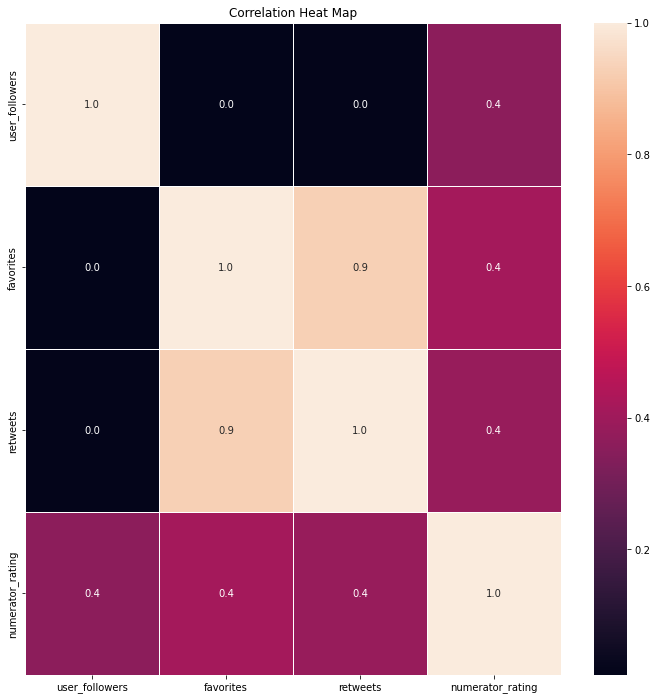

In [86]:
# To come up with a correlation map

f,ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df_enhanced_clean[['source','user_followers','favorites','retweets',
               'numerator_rating']].corr(), annot=True, linewidths=.8, fmt= '.1f',ax=ax)
plt.title('Correlation Heat Map')

### Column Chart

Column chart showing the most used twitter source

In [88]:
source = df_master['source'].value_counts()

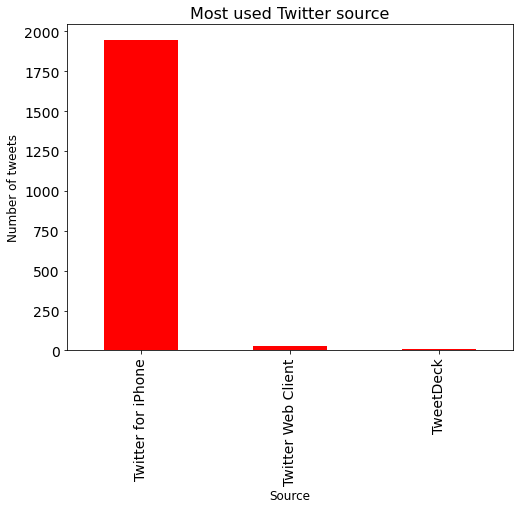

In [89]:
# To plot the column chart

source

g_bar = source.plot.bar(color = 'red', fontsize = 14)

#figure size(width, height)
g_bar.figure.set_size_inches(8, 6);

#Add labels
plt.title('Most used Twitter source', color = 'black', fontsize = '16')
plt.xlabel('Source', color = 'black', fontsize = '12')
plt.ylabel('Number of tweets', color = 'black', fontsize = '12');

### Retweets overtime (Line Chart)

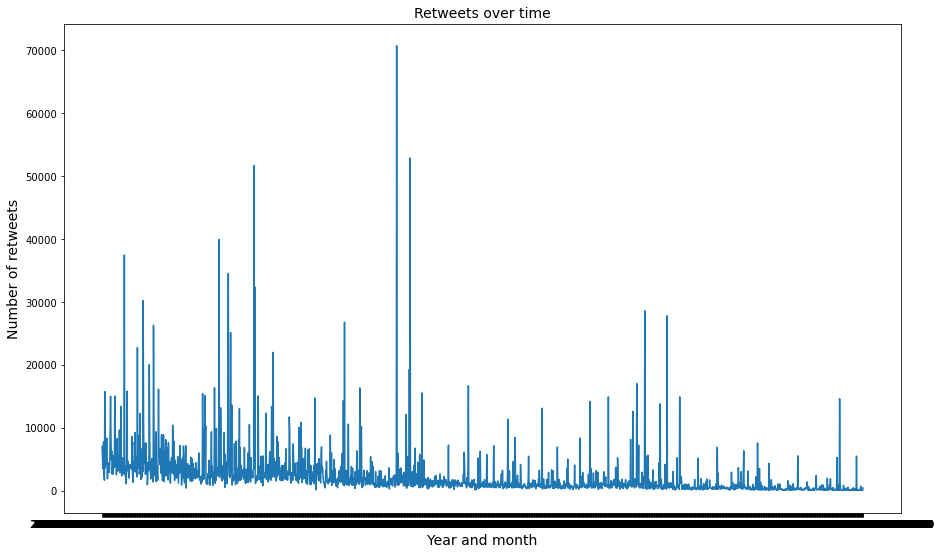

In [97]:
# To plot the line chart

sns.set_context()
plt.subplots(figsize=(15, 9))
plt.plot(df_master.timestamp, df_master.retweets)
plt.title('Retweets over time', color = 'black', fontsize = '14')
plt.xlabel('Year and month', color = 'black', fontsize = '14')
plt.ylabel('Number of retweets', color = 'black', fontsize = '14');

### Scatterplot

This section is to plot a scatterplot showing the correlation between `favorites` and `retweets`

Text(0.5, 1.0, 'Retweets and favorites Scatter plot')

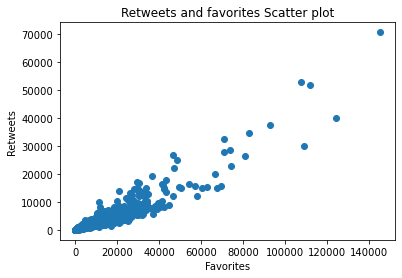

In [90]:
plt.scatter(df_enhanced_clean['favorites'], df_enhanced_clean['retweets'])
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')

In [92]:
df_master['favorites'].corr(df_master['retweets'])

0.928402898762686

This shows a positive correlation of 0.93 between favorites and retweets